In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=500)
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size=0.2,random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
# 샘플 길이 100 조정
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input,maxlen=100)
val_seq = pad_sequences(val_input,maxlen=100)

In [4]:
# LSTM 셀을 사용한 순환층 생성
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 30ms/step - loss: 0.6920 - accuracy: 0.5624 - val_loss: 0.6908 - val_accuracy: 0.6060
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6885 - accuracy: 0.6263 - val_loss: 0.6847 - val_accuracy: 0.6688
Epoch 3/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6705 - accuracy: 0.6626 - val_loss: 0.6436 - val_accuracy: 0.6992
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6180 - accuracy: 0.7200 - val_loss: 0.5953 - val_accuracy: 0.7382
Epoch 5/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5852 - accuracy: 0.7376 - val_loss: 0.5787 - val_accuracy: 0.7318
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5647 - accuracy: 0.7477 - val_loss: 0.5596 - val_accuracy: 0.7504
Epoch 7/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5460 - accuracy: 0.7602 - val_loss: 0.5434 - val_accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys


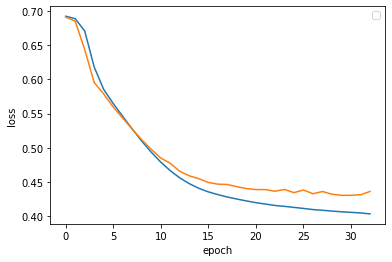

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train','val')
plt.show()
# 기본 순환층보단 LSTM이 과대적합 억제

In [8]:
# dropout 적용
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3)) # 30% dropout
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# 검증 손실 향상

Epoch 1/100
313/313 [==============================] - 12s 32ms/step - loss: 0.6921 - accuracy: 0.5515 - val_loss: 0.6908 - val_accuracy: 0.6254
Epoch 2/100
313/313 [==============================] - 10s 30ms/step - loss: 0.6866 - accuracy: 0.6232 - val_loss: 0.6749 - val_accuracy: 0.6090
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6451 - accuracy: 0.6714 - val_loss: 0.6153 - val_accuracy: 0.7170
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6125 - accuracy: 0.7135 - val_loss: 0.5963 - val_accuracy: 0.7302
Epoch 5/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5953 - accuracy: 0.7269 - val_loss: 0.5854 - val_accuracy: 0.7388
Epoch 6/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5784 - accuracy: 0.7380 - val_loss: 0.5681 - val_accuracy: 0.7482
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5649 - accuracy: 0.7426 - val_loss: 0.5559 - val_acc

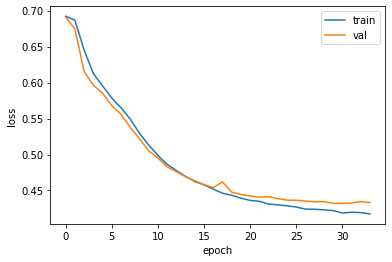

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 훈련손실과 검증손실 간 차이 감소

In [12]:
# 2개 층 연결
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

In [13]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model3.fit(train_seq,train_target,epochs=100,batch_size=74,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
271/271 [==============================] - 19s 59ms/step - loss: 0.6921 - accuracy: 0.5440 - val_loss: 0.6905 - val_accuracy: 0.5668
Epoch 2/100
271/271 [==============================] - 16s 57ms/step - loss: 0.6796 - accuracy: 0.6347 - val_loss: 0.6575 - val_accuracy: 0.6414
Epoch 3/100
271/271 [==============================] - 15s 57ms/step - loss: 0.6174 - accuracy: 0.7008 - val_loss: 0.5890 - val_accuracy: 0.7212
Epoch 4/100
271/271 [==============================] - 15s 57ms/step - loss: 0.5780 - accuracy: 0.7244 - val_loss: 0.5580 - val_accuracy: 0.7444
Epoch 5/100
271/271 [==============================] - 15s 57ms/step - loss: 0.5462 - accuracy: 0.7459 - val_loss: 0.5319 - val_accuracy: 0.7604
Epoch 6/100
271/271 [==============================] - 15s 57ms/step - loss: 0.5262 - accuracy: 0.7560 - val_loss: 0.5124 - val_accuracy: 0.7714
Epoch 7/100
271/271 [==============================] - 15s 57ms/step - loss: 0.5084 - accuracy: 0.7677 - val_loss: 0.4999 - val_ac

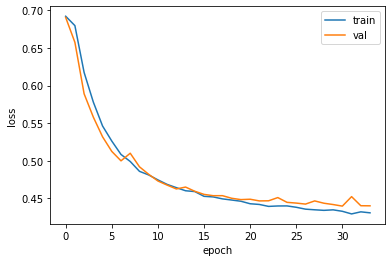

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 과대적합을 제어&손실 감소

In [16]:
# GRU 신경망 훈련
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

In [17]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model4.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# LSTM과 비슷한 성능

Epoch 1/100
313/313 [==============================] - 12s 32ms/step - loss: 0.6923 - accuracy: 0.5270 - val_loss: 0.6913 - val_accuracy: 0.5634
Epoch 2/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6900 - accuracy: 0.5696 - val_loss: 0.6887 - val_accuracy: 0.5780
Epoch 3/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6862 - accuracy: 0.5889 - val_loss: 0.6844 - val_accuracy: 0.5970
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6800 - accuracy: 0.6122 - val_loss: 0.6771 - val_accuracy: 0.6136
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6700 - accuracy: 0.6288 - val_loss: 0.6657 - val_accuracy: 0.6270
Epoch 6/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6538 - accuracy: 0.6472 - val_loss: 0.6475 - val_accuracy: 0.6466
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6278 - accuracy: 0.6679 - val_loss: 0.6176 - val_ac

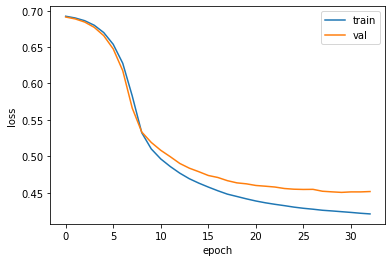

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()